In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from duckdb.experimental.spark.sql.functions import like
from skimpy import skim

In [2]:
data = pd.read_csv('../data/marketing_analytics_realistic_48000.csv')

In [3]:
data.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8001,44,Male,31779,Referral,Awareness,2394.43,0.0725,0.0280,4,2.0,1.43,1,2,0,0,511,LinkedIn,MailChimp,0
1,8002,44,Female,26673,PPC,Awareness,2723.26,0.2145,0.0336,17,3.0,2.88,2,5,1,0,3,Google,Meta Ads Manager,0
2,8003,29,Female,64885,Email,Awareness,1157.71,0.1599,0.0187,3,4.0,0.28,1,0,0,0,382,Google,Google Ads,0
3,8004,46,Male,98867,Social Media,Conversion,1175.39,0.1933,0.0408,6,5.0,5.74,1,0,0,0,239,Google,Hootsuite,0
4,8005,26,Female,32520,Email,Awareness,682.32,0.0417,0.0068,6,3.0,9.48,19,7,2,0,440,Google,Hootsuite,0


In [4]:
data.shape

(48000, 20)

There are 8000 rows and 20 columns in our data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           48000 non-null  int64  
 1   Age                  48000 non-null  int64  
 2   Gender               48000 non-null  object 
 3   Income               48000 non-null  int64  
 4   CampaignChannel      48000 non-null  object 
 5   CampaignType         48000 non-null  object 
 6   AdSpend              48000 non-null  float64
 7   ClickThroughRate     45564 non-null  float64
 8   ConversionRate       48000 non-null  float64
 9   WebsiteVisits        48000 non-null  int64  
 10  PagesPerVisit        45578 non-null  float64
 11  TimeOnSite           48000 non-null  float64
 12  SocialShares         48000 non-null  int64  
 13  EmailOpens           48000 non-null  int64  
 14  EmailClicks          48000 non-null  int64  
 15  PreviousPurchases    48000 non-null 

##### **Discrete Numerical Variables:** // Integers, Countable Variables
* Age
* WebSiteVisits
* SocialShares
* EmailOpens
* EmailClicks
* PreviousPurchases
* Conversion(Target)

##### **Continous Numerical Variables:** // Floats, Measurable Variables
* Income
* Adspend
* ConversionRate
* ClickThroughRate
* PagesPerVisit
* TimeOnSite
* LoyaltyPoints

##### **Categorical Variables:**
* Gender
* CampaignType
* CampaignChannel
* AdvertisingPlatform
* AdvertisingTool



There are 14 numerical, 5 categorical columns.

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,48000.0,32000.500000,13856.550797,8001.00,20000.7500,32000.5000,44000.250000,56000.00
Age,48000.0,38.616479,10.588908,18.00,30.0000,36.0000,48.000000,69.00
Income,48000.0,40266.327625,18654.735309,18000.00,26712.0000,36264.5000,49104.500000,140000.00
AdSpend,48000.0,2203.263246,2000.140185,236.18,799.5750,1542.0250,2835.537500,9000.00
ClickThroughRate,45564.0,0.080242,0.081727,0.00,0.0088,0.0500,0.136825,0.28
ConversionRate,48000.0,0.030533,0.032929,0.00,0.0070,0.0177,0.042500,0.18
WebsiteVisits,48000.0,7.407396,6.515186,1.00,2.0000,6.0000,11.000000,40.00
PagesPerVisit,45578.0,3.981614,2.320345,2.00,2.0000,3.0000,5.000000,12.00
TimeOnSite,48000.0,3.491764,3.266656,0.00,1.0200,2.4600,4.970000,14.00
SocialShares,48000.0,4.070104,5.861530,0.00,0.0000,1.0000,5.000000,56.00


In [7]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 48000  │ │ int64       │ 10    │                                                          │
│ │ Number of columns │ 20     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column      ┃ NA   ┃ NA %         ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ CustomerID  │    0 │            0 │   32000 │   13860 │  8001 │  20000 │  32000 │  44000 │  56000 │ ██████ │  │
│ │ Age         │    0 │            0 │   38.62 │   10.59 │    18 │     30 │     36 │     48 │     69 │ ▃█▃▆▃  │  │
│ │ Income      │    0 │            0 │   40270 │   18650 │ 18000 │  26710 │  36260 │  49100 │ 140000 │  █▅▁   │  │
│ │ AdSpend     │    0 │            0 │    2203 │    2000 │ 236.2 │  799.6 │   1542 │   2836 │   9000 │ █▄▁▁ ▁ │  │
│ │ ClickThroug │ 2436 │        5.075 │ 0.08024 │ 0.08173 │     0 │ 0.0088 │   0.05 │ 0.1368 │   0.28 │ █▃▂▂▁▁ │  │
│ │ hRate       │      │              │         │         │       │        │        │        │        │        │  │
│ │ ConversionR │    0 │            0 │ 0.03053 │ 0.03293 │     0 │  0.007 │ 0.0177 │ 0.0425 │   0.18 │  █▂▁▁  │  │
│ │ ate         │      │              │         │         │       │        │        │        │        │        │  │
│ │ WebsiteVisi │    0 │            0 │   7.407 │   6.515 │     1 │      2 │      6 │     11 │     40 │  █▄▁   │  │
│ │ ts          │      │              │         │         │       │        │        │        │        │        │  │
│ │ PagesPerVis │ 2422 │ 5.0458333333 │   3.982 │    2.32 │     2 │      2 │      3 │      5 │     12 │  █▄▁▁  │  │
│ │ it          │      │        33333 │         │         │       │        │        │        │        │        │  │
│ │ TimeOnSite  │    0 │            0 │   3.492 │   3.267 │     0 │   1.02 │   2.46 │   4.97 │     14 │ █▄▂▁▁▁ │  │
│ │ SocialShare │    0 │            0 │    4.07 │   5.862 │     0 │      0 │      1 │      5 │     56 │   █▂   │  │
│ │ s           │      │              │         │         │       │        │        │        │        │        │  │
│ │ EmailOpens  │    0 │            0 │   4.074 │   4.024 │     0 │      1 │      3 │      6 │     22 │  █▅▂▁  │  │
│ │ EmailClicks │    0 │            0 │  0.4984 │   0.928 │     0 │      0 │      0 │      1 │      8 │   █▁   │  │
│ │ PreviousPur │    0 │            0 │   1.494 │   2.317 │     0 │      0 │      0 │      3 │     10 │  █▂ ▁  │  │
│ │ chases      │      │              │         │         │       │        │        │        │        │        │  │
│ │ LoyaltyPoin │    0 │            0 │    1251 │    1457 │     0 │    259 │    517 │   1946 │   8000 │  █▂▁   │  │
│ │ ts          │      │              │         │         │       │        │        │        │        │        │  │
│ │ Conversion  │    0 │            0 │ 0.01265 │  0.111

From this we can say basic analysis like:
1. [x] Age columns ranges between 18-69
2. [x] AVG Income of peoples in this data $84,664

3. [x] LoyaltPoints range between 0-5000
4. [x] Conversion is either 1-0
5. [x] Amount spend on advertisements ranges between $100-10000

In [8]:
print(f"Total duplicate rows : {data.duplicated().sum()}")

Total duplicate rows : 0


##### Identifying Unique Values From The Categorical Colums in Data

In [9]:
categorical_columns = data.select_dtypes(include='object').columns

for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"{column} : {unique_values}\n")

Gender : ['Male' 'Female']

CampaignChannel : ['Referral' 'PPC' 'Email' 'Social Media' 'SEO' 'Affiliate' 'Display']

CampaignType : ['Awareness' 'Conversion' 'Retention' 'Consideration']

AdvertisingPlatform : ['LinkedIn' 'Google' 'Facebook' 'TikTok' 'Instagram' 'Twitter' 'YouTube']

AdvertisingTool : ['MailChimp' 'Meta Ads Manager' 'Google Ads' 'Hootsuite' 'HubSpot'
 'SEMrush']



As we can see the code above:
'AdvertisingPlatform' and 'AdvertisingTool' are confidential columns which we don't need to use for our model is why we're going to drop along with 'CustomerID' column.


In [10]:
data = data.drop(['AdvertisingPlatform', 'AdvertisingTool', 'CustomerID'], axis = 1)
categorical_columns = data.select_dtypes(include='object').columns


In [11]:
data.tail()

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
47995,44,Female,19276,Social Media,Awareness,7021.89,0.0116,0.1358,15,9.0,3.70,0,16,1,3,1186,0
47996,49,Male,31380,PPC,Retention,693.58,0.2401,0.0428,1,2.0,1.36,0,5,0,0,325,0
47997,30,Male,18000,Email,Retention,2489.36,0.0087,0.0005,13,4.0,1.48,0,1,0,0,595,0
47998,52,Male,27660,SEO,Consideration,5322.62,0.0096,0.0489,4,2.0,0.70,2,2,0,0,42,0
47999,26,Male,89797,Email,Conversion,1044.68,0.0576,0.0124,1,6.0,5.98,16,5,1,0,469,0


##### Observing Outlier Values From Numerical Columns in Data

In [12]:
def plot_boxplots(data, numerical_cols, n_cols=3):
    """Sayısal değişkenler için box-plot grafikleri oluşturur.
    Aykırı değerlerin (outliers) görsel olarak saptanmasını sağlar.


    :param data : Veri çerçevesi (pd.DataFrame).
    :param numerical_cols : Box-plot çizilecek sayısal sütun isimleri listesi (list).
    :param n_cols : Yan yana kaç grafik gösterileceği (int).(default = 3)
    :return:
    """
    # Style: Arka plan bembeyaz,ızgara yok.
    sns.set_style('white')

    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, 5* n_rows))
    axes = axes.flatten()

    for i,col in enumerate(numerical_cols):
        sns.boxplot(ax = axes[i],
                    x=data[col],
                    color = 'skyblue',
                    linewidth=1.5,
                    whiskerprops=dict(color = '#1D3557', linewidth = 1.5),
        )

        axes[i].set_title(f'{col} - Outlier Analysis', fontsize = 12)
        axes[i].set_xlabel('')

    # Boş kalan subplotları temizle.
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [13]:
numerical_columns = data.select_dtypes(include=['int64','float64']).columns
numerical_columns = numerical_columns.drop(['Conversion'])

In [14]:
numerical_columns

Index(['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints'],
      dtype='object')

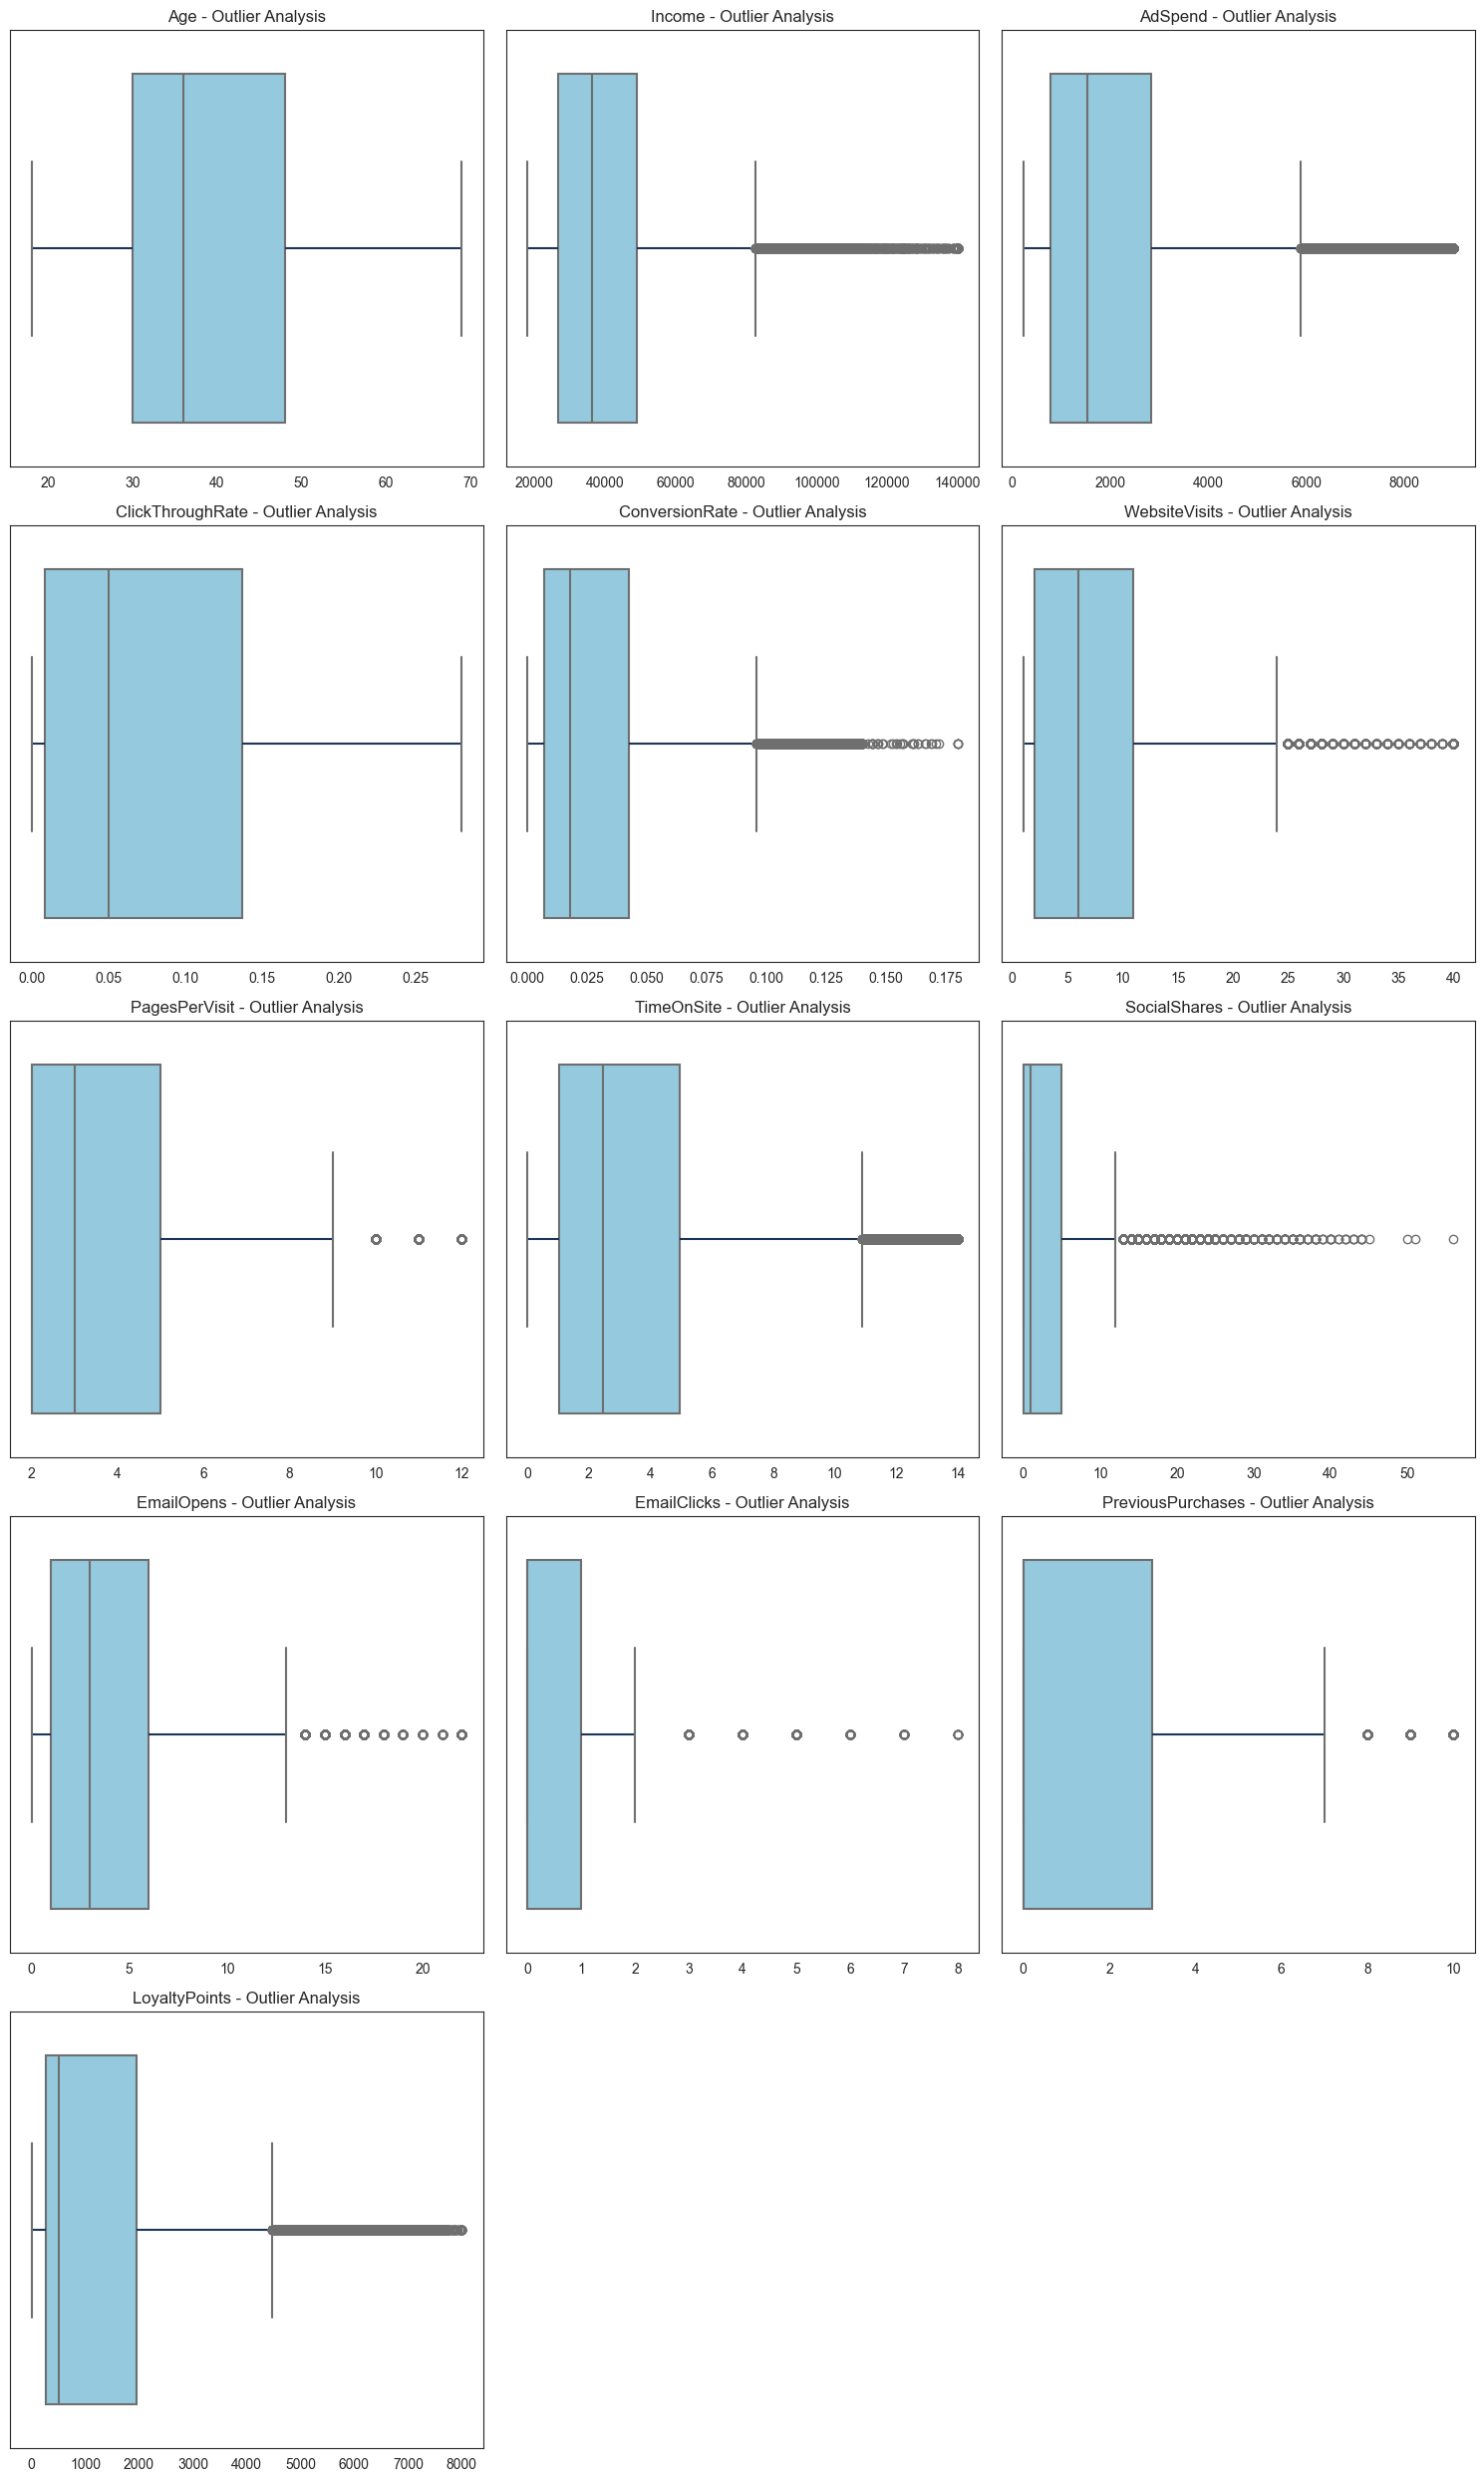

In [15]:
plot_boxplots(data, numerical_columns)

Throught this we identify that there exist no outliers in our data.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_quantile_distributions(data, numerical_columns, n_cols=3):
    """Sayısal değişkenlerin dağılımını merkezi eğilim ve kuantillerle görselleştirir.

    Histogram, KDE ve Rugplot kullanarak verinin yoğunluğunu gösterir;
    ortalama ve çeyreklik dilimleri dikey çizgilerle işaretler.

    Args:
        data (pd.DataFrame): Analiz edilecek veri seti.
        numerical_columns (list): Görselleştirilecek sayısal sütunların listesi.
        n_cols (int): Yan yana gösterilecek grafik sayısı. Varsayılan: 3.
    """
    # 1. Satır sayısını hesaplayalım (Matematiksel Tavan Fonksiyonu: ceil(toplam / sütun))
    n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

    # 2. Şekil ve eksenleri oluşturalım
    sns.set_style("white")
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6 * n_rows))

    # Eksenleri tek boyutlu diziye çevirelim (indeksle kolay erişim için)
    axes = axes.flatten()

    for i, col in enumerate(numerical_columns):
        # Mevcut ekseni seçelim
        ax = axes[i]

        # İstatistiksel hesaplamalar
        q1, q2, q3 = data[col].quantile([0.25, 0.50, 0.75])
        mu = data[col].mean()

        # Çizimler
        sns.histplot(data[col], stat='density', fill=False, ax=ax, color='gray', alpha=0.3)
        sns.kdeplot(data[col], fill=True, ax=ax, color='blue', alpha=0.2)
        sns.rugplot(data[col], ax=ax, color='gray', alpha=0.5)

        # Dikey çizgiler ve etiketler
        ax.axvline(mu, linestyle="--", color="r", label=f"Mean: {mu:.2f}")
        ax.axvline(q1, linestyle="--", color="black", label=f"Q1: {q1:.2f}")
        ax.axvline(q2, linestyle="--", color="black", label=f"Q2: {q2:.2f}")
        ax.axvline(q3, linestyle="--", color="black", label=f"Q3: {q3:.2f}")

        # Estetik ayarlar
        ax.set_title(f"Distribution of {col}", fontsize=13, fontweight='bold')
        ax.set_xlabel("")
        ax.legend(fontsize=9)
        sns.despine(ax=ax) # Kenarlıkları temizler

    # 3. Eğer boş kalan subplot varsa (Örn: 5 grafik, 2x3 düzen) onları gizle
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Kullanım:
# numerical_features = ["Age", "PagesPerVisit", "TimeOnSite", "LoyaltyPoints"]
# plot_quantile_distributions(data, numerical_features)

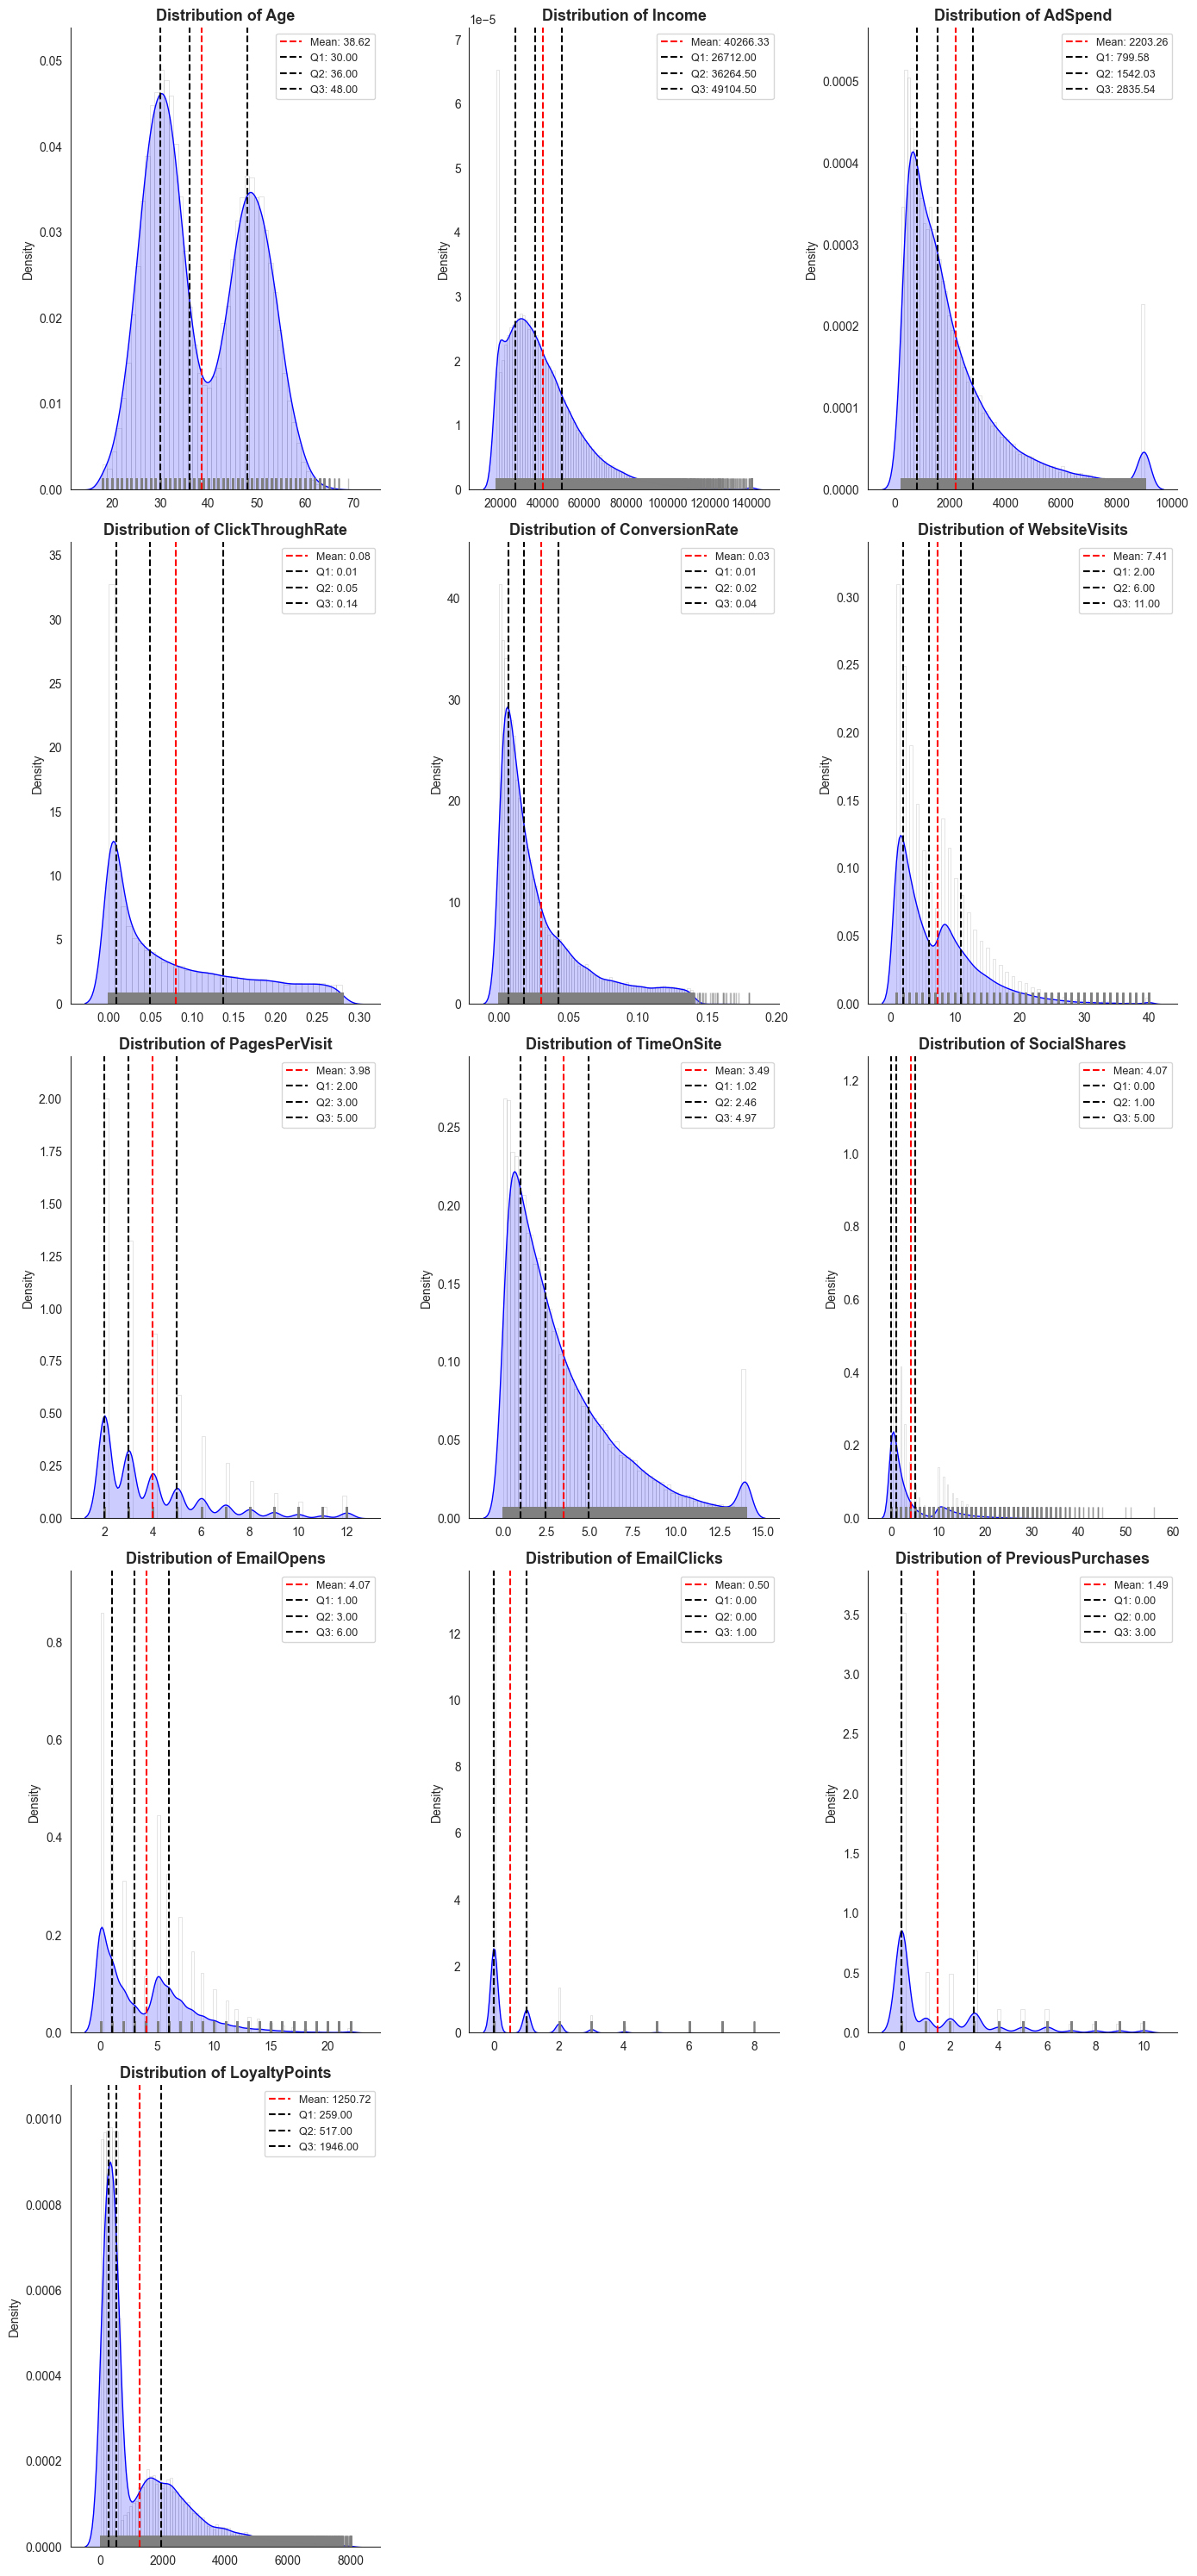

In [17]:
plot_quantile_distributions(data, numerical_columns)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_pie_charts(data, categorical_columns, n_cols=3):
    """Kategorik değişkenlerin frekans dağılımını pasta grafiği ile görselleştirir.

    Args:
        data (pd.DataFrame): Analiz edilecek veri seti.
        categorical_columns (list): Görselleştirilecek kategorik sütunların listesi.
        n_cols (int): Yan yana gösterilecek grafik sayısı. Varsayılan: 3.
    """
    # 1. Satır sayısını hesapla
    n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

    # 2. Şekil ve renk paleti oluştur
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
    fig.patch.set_facecolor('white')
    axes = axes.flatten()

    # Profesyonel renk paleti
    colors = sns.color_palette("pastel")

    for i, col in enumerate(categorical_columns):
        ax = axes[i]

        # Frekansları hesapla
        counts = data[col].value_counts()

        # Pasta grafiğini çiz
        # autopct: Yüzdeleri formatlar (%1.1f%% -> 12.5% gibi)
        # startangle: Grafiği 90 dereceden başlatır (estetik için)
        # pctdistance: Yüzde yazılarının merkeze uzaklığı
        ax.pie(counts,
               labels=counts.index,
               autopct='%1.1f%%',
               startangle=140,
               colors=colors,
               wedgeprops={'edgecolor': 'white', 'linewidth': 2}, # Dilim aralarına beyaz çizgi
               textprops={'fontsize': 10})

        ax.set_title(f"{col} Distribution", fontsize=13, fontweight='bold', pad=20)

    # Boş kalan subplot'ları temizle
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Kullanım:
# cat_features = ["CampaignType", "AdvertisingPlatform", "AdvertisingTool", "Conversion"]
# plot_categorical_pie_charts(data, cat_features)

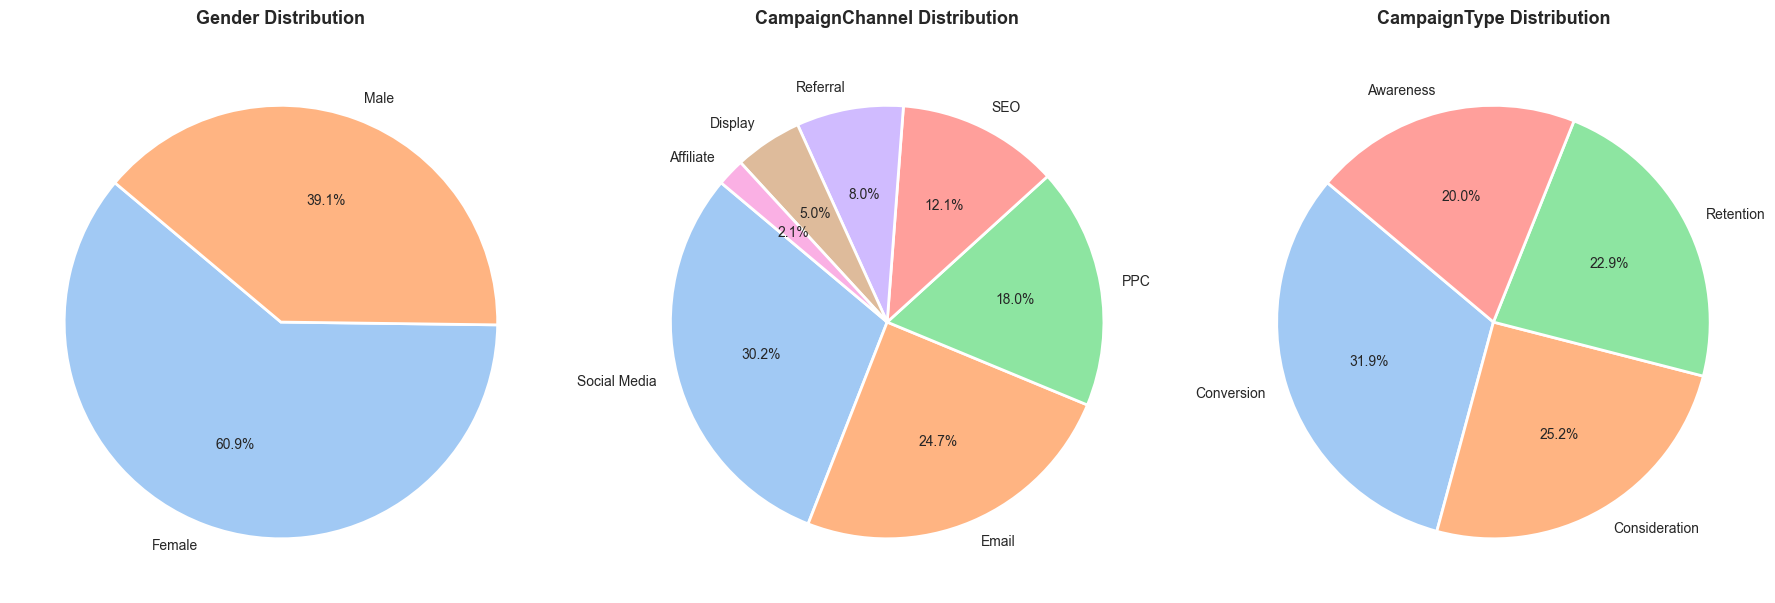

In [19]:
plot_categorical_pie_charts(data,categorical_columns)